In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
%matplotlib inline

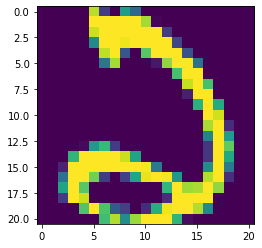

In [2]:
import numpy as np


with open('binXtrain.npy', 'rb') as f:
    newXtrain = np.load(f)


newXtrain.shape
plt.imshow(newXtrain[1987])


In [3]:
newYtrain = np.ndarray(shape=(3964,), dtype=np.uint8)
for i in range(1982):
   newYtrain[i] = 0

for i in range(1982,3964):
   newYtrain[i] = 1

newYtrain.shape


(3964,)

In [4]:
from tensorflow.keras import datasets, layers, models

X_train = newXtrain.reshape(-1,21,21,1)

model = keras.Sequential([
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(21, 21, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,newYtrain , epochs=10)

Epoch 1/10
124/124 [==============================] - 3s 5ms/step - loss: 0.3701 - accuracy: 0.9278
Epoch 2/10
124/124 [==============================] - 1s 4ms/step - loss: 0.0496 - accuracy: 0.9836
Epoch 3/10
124/124 [==============================] - 1s 4ms/step - loss: 0.0301 - accuracy: 0.9921
Epoch 4/10
124/124 [==============================] - 0s 4ms/step - loss: 0.0206 - accuracy: 0.9935
Epoch 5/10
124/124 [==============================] - 1s 4ms/step - loss: 0.0213 - accuracy: 0.9938
Epoch 6/10
124/124 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9938
Epoch 7/10
124/124 [==============================] - 1s 4ms/step - loss: 0.0100 - accuracy: 0.9982
Epoch 8/10
124/124 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9968
Epoch 9/10
124/124 [==============================] - 1s 4ms/step - loss: 0.0069 - accuracy: 0.9972
Epoch 10/10
124/124 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9980

16/16 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 1.0000


[0.003206674475222826, 1.0]

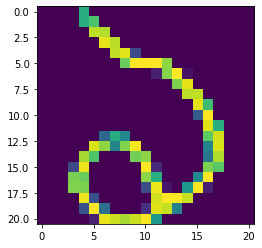

In [5]:
with open('binXtest.npy', 'rb') as f:
    newXtest = np.load(f)

newYtest = np.ndarray(shape=(496,), dtype=np.uint8)
for i in range(167):
   newYtest[i] = 0

for i in range(167,496):
   newYtest[i] = 1
X_test = newXtest.reshape(-1,21,21,1)

plt.imshow(X_test[167])
model.evaluate(X_test, newYtest)

In [6]:
predictions = model.predict(X_test)

predictions.shape

(496, 10)

In [8]:
y_predicted_labels = [np.argmax(i) for i in predictions]
cm = tf.math.confusion_matrix(labels=newYtest,predictions=y_predicted_labels)

Text(42.0, 0.5, 'Real')

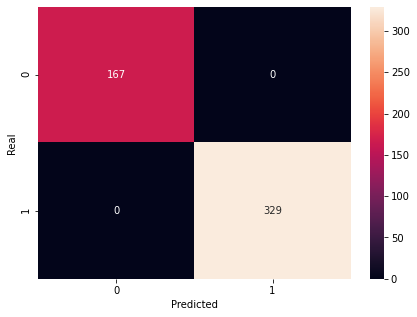

In [9]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')